In [3]:
import sys
import tensorflow as tf
import keras, keras.layers as L, keras.backend as K
import os
import cv2
import numpy as np
sys.path.append("..")

In [2]:
from pathlib import Path

DIRECTORY = Path("./done/")

images=[]
names=[]

for fp in DIRECTORY.glob('*.png'):
        img=cv2.imread(str(fp), cv2.COLOR_BGR2GRAY)
        names.append(str(fp))
        images.append(img)  

In [16]:
images_resized = [cv2.resize(image, (100, 100)) for image in images]

images_resized=[cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in images_resized]

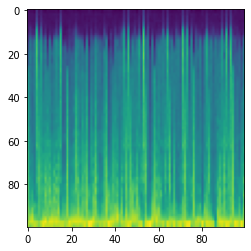

In [17]:
import matplotlib.pyplot as plt

def show_image(x):
    plt.imshow(x)
    
show_image(images_resized[1])

In [6]:
def build_pca_autoencoder(img_shape, code_size):
    
    encoder = keras.models.Sequential()
    encoder.add(L.InputLayer(img_shape))
    encoder.add(L.Flatten())                  #flatten image to vector
    encoder.add(L.Dense(code_size))           #actual encoder

    decoder = keras.models.Sequential()
    decoder.add(L.InputLayer((code_size,)))
    decoder.add(L.Dense(np.prod(img_shape)))  #actual decoder, height*width*3 units
    decoder.add(L.Reshape(img_shape))         #un-flatten
    
    return encoder,decoder

In [18]:
IMG_SHAPE=images_resized[0].shape
X=images_resized

In [19]:
IMG_SHAPE

(100, 100)

In [20]:
X=np.array(X)

In [21]:
encoder, decoder = build_pca_autoencoder(IMG_SHAPE, code_size=256)

inp = L.Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

In [22]:
autoencoder = keras.models.Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

In [286]:
autoencoder.fit(x=X, y=X, epochs=50)

Epoch 1/50
7997/7997 [==============================] - 24s 3ms/step - loss: 34.9627
Epoch 2/50
7997/7997 [==============================] - 25s 3ms/step - loss: 75.8368
Epoch 3/50
7997/7997 [==============================] - 24s 3ms/step - loss: 27.6606
Epoch 4/50
7997/7997 [==============================] - 27s 3ms/step - loss: 26.0282
Epoch 5/50
7997/7997 [==============================] - 22s 3ms/step - loss: 25.9515
Epoch 6/50
7997/7997 [==============================] - 31s 4ms/step - loss: 28.1959
Epoch 7/50
7997/7997 [==============================] - 26s 3ms/step - loss: 44.3064
Epoch 8/50
7997/7997 [==============================] - 22s 3ms/step - loss: 54.2951
Epoch 9/50
7997/7997 [==============================] - 24s 3ms/step - loss: 26.4345
Epoch 10/50
7997/7997 [==============================] - 25s 3ms/step - loss: 96.4429
Epoch 11/50
7997/7997 [==============================] - 23s 3ms/step - loss: 26.4511
Epoch 12/50
7997/7997 [==============================] - 32s 4m

In [287]:
codes=encoder.predict(X)

In [288]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(codes)

distances, indices = nbrs.kneighbors(codes)

In [289]:
i=34
j=0

In [292]:
from pygame import mixer  

mixer.init()
mixer.music.load((names[indices[i][j]]).replace(".png",""))
mixer.music.play()

In [291]:
mixer.init()
mixer.music.load((names[indices[i][j+1]]).replace(".png",""))
mixer.music.play()

In [285]:
mixer.init()
mixer.music.load((names[indices[i][j+2]]).replace(".png",""))
mixer.music.play()

In [281]:
mixer.init()
mixer.music.load((names[indices[i][j+3]]).replace(".png",""))
mixer.music.play()